In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie

In [3]:
function model(u, p ,t)
    
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    
    U(y, U0, ΔU0, ythr) = U0 + ΔU0 / ( 1.0 + exp( -50.0 * ( y - ythr ) ) )
    σ(x, xthr)= 1.0 / (1.0 + exp(-20.0 * (x - xthr)));
    
    du1 = (-E + α * log( 1.0 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1.0 - x ) / τ_D - u_ * x * E
    du3 = (U(y, U0, ΔU0, ythr) - u_) / τ_F + U(y, U0, ΔU0, ythr) * ( 1.0 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x, xthr)
    
    return SVector(du1, du2, du3, du4)
    
end;

In [8]:
τ = 0.013; τ_D = 0.15; τ_y = 1.8; τ_F = 1;
α = 1.5; J = 3.07; β = 0.4375
ΔU0 = 0.305
xthr = 0.9; ythr = 0.5
integ_setting = (alg = RK4(), adaptive = false, dt = 0.001)

(alg = RK4(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), adaptive = false, dt = 0.001)

In [9]:
I0 = -1.42; U0 = 0.23;

In [6]:
parametres = SA[  τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0  ]
condition = SA[2.9537, 0.7811, 0.6321, 0.066];

In [12]:
prob = CoupledODEs(model, condition, parametres, diffeq = integ_setting)

4-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  model
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [0.013, 1.5, 0.15, 3.07, 0.23, 0.305, 1.8, 0.4375, 0.9, 0.5, -1.42]
 time:          0.0
 state:         [2.9537, 0.7811, 0.6321, 0.066]


In [13]:
tr, trange = trajectory(prob, 500; Ttr = 500, Δt = integ_setting.dt)

(4-dimensional StateSpaceSet{Float64} with 500001 points, 500.0:0.001:1000.0)

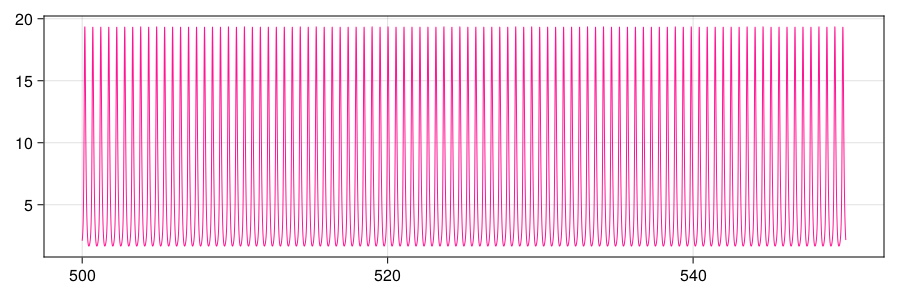

CairoMakie.Screen{IMAGE}


In [23]:
CairoMakie.activate!()
ts, tf = 1, 50000
f = Figure(resolution = (900, 300))
axis = Axis(f[1, 1])
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 1.0, color = :deeppink)
display(f)

In [24]:
GLMakie.activate!()
display(f)

GLMakie.Screen(...)

In [27]:
f = Figure(resolution = (600, 600))
axis = LScene(f[1, 1])
scale!(axis.scene, 50, 50, 1)
lines!(tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1])
display(f)

GLMakie.Screen(...)